In [6]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from IPython.display import display


In [13]:
data_all =  pd.read_csv('../processed_data/train_none_rf_impute_cv_xrb_pulsar' , index_col = 'obs_id').iloc[: , 1:]
data_all = data_all[data_all['class'].isin(['XRB' , 'PULSAR' , 'CV'])]
display(data_all)
np.random.seed(433)
data = data_all.sample(frac=1)
data_label = data['class']
x = data.copy()
brems_model = ['brems_nh' , 'brems_nh_lolim' , 'brems_nh_hilim' , 'brems_kt' , 'brems_kt_lolim' , 'brems_kt_hilim']
inter_obs_param = ['var_inter_index' , 'var_inter_prob' , 'var_inter_sigma' , 'bb_kt_hilim']
x = x.drop(columns = brems_model + inter_obs_param +['bb_stat'])
y = data_label.copy()
#id = x[['class' , 'src_n' , 'src_id' , 'significance']]
#x = x.drop(columns = ['class' , 'src_n' , 'src_id' , 'significance'])
display(x , y)

,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
CV_OBS_422,CV,CXOGLB J002403.6-72045,CV0073,12.38,-14.526659,-14.519706,-14.182765,-13.000000,-14.081131,-15.392009,...,0.000000e+00,0.000000,1.000,19.000,51.000,11.000,160.00,182.0,170.00,1.000
PULSAR_OBS_348,PULSAR,PSR J1833-103,PL0099,121.78,-15.370285,-13.414426,-15.903438,-15.907279,-15.777804,-15.734004,...,0.000000e+00,0.000000,1.000,19.000,48.000,11.000,155.00,177.0,161.00,1.000
CV_OBS_238,CV,[HPH2013] 196,CV0020,8.11,-14.504178,-15.563678,-13.660946,-12.740167,-12.696156,-14.658170,...,1.442000e-05,0.000022,1.170,13.580,46.030,10.190,98.86,106.5,84.95,0.734
CV_OBS_785,CV,XSS J12270-4859,CV0112,27.61,-14.030211,-13.827397,-13.970616,-11.797239,-11.805208,-15.702239,...,0.000000e+00,0.000000,1.000,19.000,50.000,11.000,162.00,184.0,171.00,1.000
NS_OBS_198,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.000000,-13.000000,-14.659358,-13.000000,-14.884057,-14.000000,...,0.000000e+00,0.000000,1.000,15.000,33.000,8.000,137.00,158.0,147.00,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_535,CV,CXOGLB J002407.1-72054,CV0083,18.17,-14.327533,-15.003795,-14.285335,-13.915781,-13.699839,-14.509901,...,0.000000e+00,0.000000,1.000,19.000,51.000,11.000,162.00,186.0,170.00,1.000
NS_OBS_178,XRB,XMMU J004245.2+41172,NS0044,49.26,-14.009972,-13.354774,-13.381847,-12.376234,-12.337337,-14.153477,...,1.308000e-05,0.000018,1.221,100.000,34.000,64.020,94.52,101.8,87.73,1.141
CV_OBS_384,CV,CXOGLB J002402.1-72054,CV0069,46.73,-15.308653,-13.000000,-14.283329,-11.692932,-11.701147,-14.000000,...,1.409000e-03,0.002699,1.082,1.581,1.745,1.439,1472.00,1571.0,1380.00,1.057


,class,src_n,src_id,significance,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,...,powlaw_stat,bb_kt,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim,bb_nh,bb_ampl,bb_ampl_lolim,bb_ampl_hilim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_100,XRB,CXOU J100516.5-07420,BH0021,16.75,-15.097834,-15.051001,-15.066462,-14.768785,-14.561299,-15.411392,...,1.000,0.0000,0.0000,120.000,183.0,98.000000,0.000000,0.000000,0.000000,1.000
CV_OBS_414,CV,CXOGLB J002403.1-72044,CV0072,6.22,-13.705093,-13.381324,-14.730020,-14.142547,-13.826522,-15.006123,...,1.000,0.0000,0.0000,112.000,168.0,93.000000,0.000000,0.000000,0.000000,1.000
CV_OBS_55,CV,[HPH2013] 108,CV0005,14.30,-14.552532,-14.626536,-14.292941,-13.833570,-13.687611,-14.801068,...,1.000,0.0000,0.0000,112.000,168.0,93.000000,0.000000,0.000000,0.000000,1.000
NS_OBS_123,XRB,GRS 1741.9-2853,NS0021,376.06,-15.324680,-13.952725,-14.164753,-13.650722,-13.559878,-14.000000,...,1.000,0.0000,0.0000,122.000,184.0,98.000000,0.000000,0.000000,0.000000,1.000
NS_OBS_88,XRB,EXO 1745-248,NS0020,23.47,-12.676335,-13.069306,-13.022276,-12.219251,-12.107571,-12.907279,...,1.000,0.0000,0.0000,122.000,182.0,98.000000,0.000000,0.000000,0.000000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV_OBS_548,CV,CXOGLB J002407.7-72052,CV0084,8.88,-14.006608,-13.000000,-14.452718,-13.000000,-13.957031,-14.871924,...,1.000,0.0000,0.0000,112.000,166.0,92.000000,0.000000,0.000000,0.000000,1.000
BH_OBS_84,XRB,CXOU J100516.2-07423,BH0020,16.78,-14.061380,-15.487449,-13.935542,-13.138645,-13.056357,-14.176917,...,1.239,0.8088,0.7494,1.199,162.0,0.000003,0.000012,0.000011,0.000015,1.240
PULSAR_OBS_132,PULSAR,PSR J1044-5737,PL0032,4.57,-15.010150,-13.000000,-14.752763,-13.470826,-13.461426,-15.667764,...,1.000,0.0000,0.0000,69.000,132.0,57.000000,0.000000,0.000000,0.000000,1.000


obs_id
BH_OBS_100           XRB
CV_OBS_414            CV
CV_OBS_55             CV
NS_OBS_123           XRB
NS_OBS_88            XRB
                   ...  
CV_OBS_548            CV
BH_OBS_84            XRB
PULSAR_OBS_132    PULSAR
PULSAR_OBS_298    PULSAR
BH_OBS_112           XRB
Name: class, Length: 1396, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train_all , x_test_all , y_train , y_test = train_test_split(x , y , test_size=0.2 , shuffle=True, random_state=10 , stratify=y)
info_col =  ['class' , 'src_n' , 'src_id' , 'significance']
x_train = x_train_all.drop(columns = info_col)
x_test = x_test_all.drop(columns = info_col)
id_train = x_train_all[info_col]
id_test = x_train_all[info_col]

In [22]:
classes = ['XRB' , 'CV' , 'PULSAR']
y_train = y_train.replace('XRB' , 0)
y_train = y_train.replace('CV' , 1)
y_train = y_train.replace('PULSAR' , 2)
y_train

obs_id
BH_OBS_63         0
CV_OBS_311        1
CV_OBS_716        1
PULSAR_OBS_391    2
CV_OBS_440        1
                 ..
PULSAR_OBS_217    2
PULSAR_OBS_216    2
CV_OBS_486        1
PULSAR_OBS_52     2
NS_OBS_403        0
Name: class, Length: 1116, dtype: int64

In [33]:
x_train

,flux_aper_hilim_s,flux_aper_hilim_u,flux_aper_hilim_m,flux_aper_hilim_h,flux_aper_hilim_b,flux_aper_lolim_s,flux_aper_lolim_u,flux_aper_lolim_m,flux_aper_lolim_h,flux_aper_lolim_b,...,powlaw_stat,bb_kt,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim,bb_nh,bb_ampl,bb_ampl_lolim,bb_ampl_hilim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_63,-14.207468,-13.000000,-14.778847,-13.359618,-13.444301,-14.527829,-13.000000,-15.644166,-14.214884,-13.721704,...,1.000,0.0000,0.0000,122.000,179.000,9.800000e+01,0.000000,0.000000,0.000000,1.000
CV_OBS_311,-13.045757,-12.861382,-12.886725,-12.157017,-12.063788,-13.187889,-13.730721,-12.986741,-12.249183,-12.126563,...,1.403,0.7854,0.7441,1.846,164.000,1.603000e-06,0.000142,0.000101,0.000169,1.435
CV_OBS_716,-12.586868,-10.954286,-12.200728,-11.644932,-11.510042,-12.617083,-11.392331,-12.216096,-11.659358,-11.519993,...,0.924,0.7634,0.7534,7.904,4.794,6.334000e+00,0.000786,0.000746,0.000829,1.053
PULSAR_OBS_391,-13.882397,-12.523024,-14.270997,-14.016013,-13.957818,-14.000000,-13.000000,-15.136261,-15.595851,-14.594483,...,1.000,0.0000,0.0000,65.000,131.000,5.700000e+01,0.000000,0.000000,0.000000,1.000
CV_OBS_440,-13.502656,-12.692290,-13.530031,-13.069051,-12.910802,-13.987585,-13.000000,-13.786482,-13.364215,-13.091301,...,1.000,0.0000,0.0000,112.000,168.000,9.300000e+01,0.000000,0.000000,0.000000,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_217,-12.847100,-13.224244,-12.716925,-12.076652,-11.953115,-12.969400,-13.000000,-12.806041,-12.159580,-12.007667,...,1.250,0.7188,0.6727,1.455,147.000,4.152000e-06,0.000266,0.000213,0.000331,1.270
PULSAR_OBS_216,-14.850473,-13.000000,-14.815593,-13.578232,-13.721246,-14.000000,-13.000000,-14.000000,-13.000000,-13.000000,...,1.000,0.0000,0.0000,70.000,131.000,5.800000e+01,0.000000,0.000000,0.000000,1.000
CV_OBS_486,-14.695941,-13.000000,-14.293197,-13.415217,-13.398266,-15.157640,-13.000000,-14.594312,-13.648590,-13.563678,...,1.000,0.0000,0.0000,112.000,168.000,9.300000e+01,0.000000,0.000000,0.000000,1.000


In [23]:
one_hot_y_train =  to_categorical(y_train)

In [46]:
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv2D
#from tensorflow.keras.layers.pooling import MaxPooling2D
visible = layers.Input(shape=(81,1))
#x = layers.BatchNormalization(axis=-1)(visible)
x = layers.Conv1D(60, kernel_size=4, activation='relu')(visible)
x = layers.MaxPool1D(pool_size=(2))(x)

x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPool1D(pool_size=(2))(x)

#x = layers.Conv1D(32, kernel_size=4, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=(2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)
model_cnn = keras.Model(inputs=visible, outputs=output)
# summarize layers
#print(model_cnn.summary())
model_cnn.compile(
        loss = "categorical_crossentropy",
        optimizer = keras.optimizers.Adam(learning_rate=0.0001),
        metrics = ["accuracy"],
    )
history = model_cnn.fit(x_train, one_hot_y_train, batch_size=128, epochs=220, validation_split=0.2)

Epoch 1/220
7/7 [==============================] - 1s 62ms/step - loss: 1.6951 - accuracy: 0.3643 - val_loss: 1.2843 - val_accuracy: 0.3616
Epoch 2/220
7/7 [==============================] - 0s 20ms/step - loss: 1.4796 - accuracy: 0.3823 - val_loss: 1.2589 - val_accuracy: 0.3795
Epoch 3/220
7/7 [==============================] - 0s 21ms/step - loss: 1.3865 - accuracy: 0.3812 - val_loss: 1.1334 - val_accuracy: 0.3571
Epoch 4/220
7/7 [==============================] - 0s 20ms/step - loss: 1.3051 - accuracy: 0.3924 - val_loss: 1.1009 - val_accuracy: 0.4152
Epoch 5/220
7/7 [==============================] - 0s 19ms/step - loss: 1.2608 - accuracy: 0.3890 - val_loss: 1.0893 - val_accuracy: 0.3527
Epoch 6/220
7/7 [==============================] - 0s 19ms/step - loss: 1.2368 - accuracy: 0.4148 - val_loss: 1.0806 - val_accuracy: 0.3616
Epoch 7/220
7/7 [==============================] - 0s 20ms/step - loss: 1.2087 - accuracy: 0.3722 - val_loss: 1.0679 - val_accuracy: 0.3705
Epoch 8/220
7/7 [===

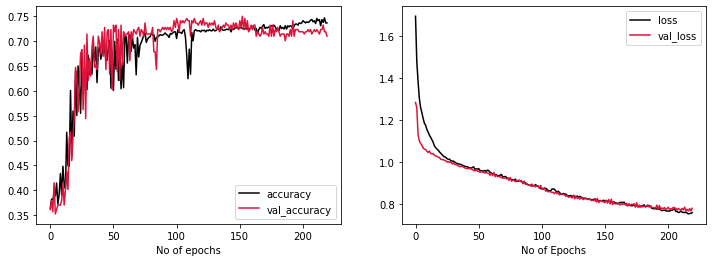

In [47]:
hist = history.history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'] , label = 'accuracy' , color='k')
plt.plot(hist['val_accuracy'] , label = 'val_accuracy' , color='crimson')
plt.xlabel('No of epochs')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'] , label = 'loss' , color='k')
plt.plot(hist['val_loss'] , label='val_loss' , color='crimson')
plt.xlabel("No of Epochs")
plt.legend()
#plt.savefig('plots/bn_model_level_0_rows.png')
plt.show()